# Example 2: UQ of a CFD problem with one input parameter

In [11]:
from equadratures import *
import numpy as np
import matplotlib.pyplot as plt
import warnings
from copy import deepcopy
warnings.filterwarnings("ignore")

#%matplotlib notebook

## 1. Defining our parameter

We don't have any prior knowledge of what $\hat{\nu}/\nu$ should be, except for that it lies in the range 1 to 100, so lets set it as a uniform distribution.

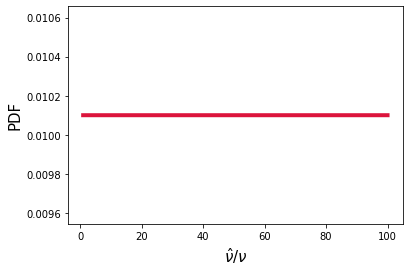

In [12]:
# Define nu_hat/nu as a parameter called s1
s1 = ??? #Spalart variable ratio

# Plot the pdf of s1
z, pdf = s1.get_pdf()
plt.plot(z, pdf, '-', c='crimson', lw=4)
plt.xlabel(r'$\hat{\nu}/\nu$', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.show()

## 2. Defining a basis and polynomial

As in example 1, define a Basis and a Poly object

In [3]:
mybasis = ???
mypoly = ???

## 3. Running the DOE

Again get the DOE points from ``mypoly`` with ``get_points()``. This time we will save the ``pts`` to file as we'll need them later.  

In [13]:
# Get the DOE points
pts = ???
print(pts)

# Save to file
np.save('points_to_run.npy', pts)

[[ 7.87375258]
 [33.67093834]
 [67.32906166]
 [93.12624742]]


## 4. Finding polynomial coefficients

### 4a. Loading DOE evaluations

CFD runs have been run for all 4 DOE samples, the resulting loss coefficients ``Yp`` for each are stored in "lossarray.npy". Lets load these CFD results and pass them back to poly.

In [15]:
# Load the Yp array from file
Yp = np.load('lossarray_sa.npy').reshape(-1, 1)

# Print the Yp array
print('SA ratio \t Yp')
print(np.hstack([pts,Yp]))

SA ratio 	 Yp
[[7.87375258e+00 5.30272519e-02]
 [3.36709383e+01 5.40504781e-02]
 [6.73290617e+01 5.51062411e-02]
 [9.31262474e+01 5.58407910e-02]]


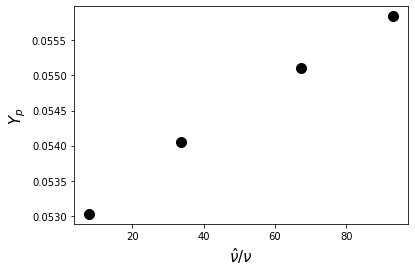

In [16]:
# Plot Yp vs s1
plt.plot(pts,Yp, 'ko', ms=10)
plt.xlabel(r'$\hat{\nu}/\nu$', fontsize=15)
plt.ylabel(r'$Y_p$', fontsize=15)
plt.show()

### 4b. Passing DOE evaluations to Poly

As in example 1, lets pass the model evaluations back to ``mypoly`` with ``set_model()``.

In [18]:
mypoly.???

## 5. Computing the moments 

No we can compute the moments, i.e. $\overline{Y_p}$ and $Var(Y_p)$ due to the uncertainty in $s_1=\nu_t/\nu$.

In [19]:
print(???)

(0.0545281508380749, 8.748570760676165e-07)
